In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_moons
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import make_blobs

# new import statements
from sklearn.cluster import KMeans, AgglomerativeClustering

### `StandardScaler` with `KMeans`

Recall that `StandardScaler` should always be applied after applying `PolynomialFeatures`.

<AxesSubplot:xlabel='0', ylabel='1'>

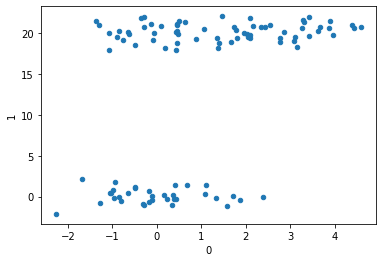

In [2]:
x = datasets.make_blobs(centers=np.array([(0, 0), (0, 20), (3, 20)]))[0]
df = pd.DataFrame(x)
df.plot.scatter(x=0, y=1, figsize=(6, 4))

In [3]:
km_c = KMeans(2)
km_c.fit(df)
km_c.predict(df)

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int32)

#### `fit_predict(...)` is a shortcut for `fit` and `predict` method invocations.

In [4]:
KMeans(2).fit_predict(df)

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0], dtype=int32)

<AxesSubplot:xlabel='0', ylabel='1'>

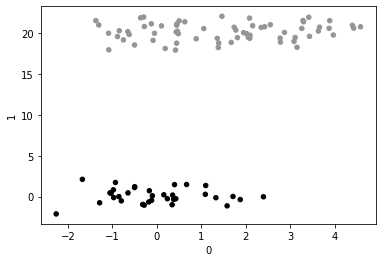

In [5]:
# -1 => white, 0 => gray, 1 => black
df.plot.scatter(x=0, y=1, figsize=(6, 4), c=KMeans(2).fit_predict(df), vmin=-1, vmax=1)

**Observation**: scale for columns are intentionally not specified.

In [6]:
df

,0,1
0,-0.652863,20.146472
1,3.298545,21.360092
2,-0.978682,0.825023
3,0.186439,18.098984
4,-0.119228,-0.456863
...,...,...
95,0.396348,1.461480
96,-0.282694,20.780631
97,0.418305,17.904819
98,0.353204,0.184441


Let's make a copy of the data. Assuming initial data for both columns is in "km", let's convert one column (`0`) into "meters". 

In [7]:
df2 = df.copy()
df2[0] *= 1000 # km => m
df2.head()

,0,1
0,-652.862600,20.146472
1,3298.545412,21.360092
2,-978.682044,0.825023
3,186.439297,18.098984
4,-119.228194,-0.456863


<AxesSubplot:xlabel='0', ylabel='1'>

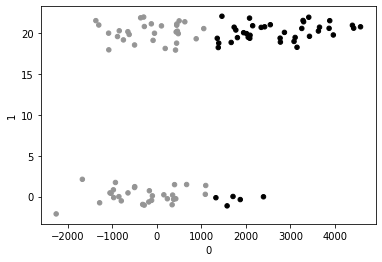

In [8]:
df2.plot.scatter(x=0, y=1, figsize=(6,4), c=KMeans(2).fit_predict(df2), vmin=-1, vmax=1)

**Observations**:
- One would expect to see the same clusters, but that is not happening here. Why?
    - x-axis difference is too high when compared to the y-axis difference
    - That is, KMeans doesn't get that x-axis has scaled data, whereas y-axis doesn't have scaled data
- This is not too far off from realistic datasets. 
    - That is, real-world dataset columns might have difference units. 
    - For example, one column might be representing temperature data where as another might be representing distance.

#### Conclusion: `StandardScaler` should be applied before `KMeans`

<AxesSubplot:xlabel='0', ylabel='1'>

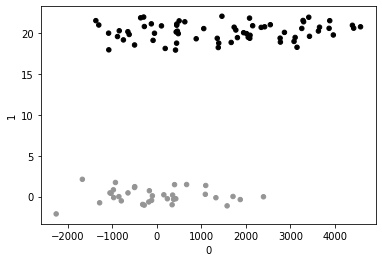

In [9]:
model = Pipeline([
    ("std", StandardScaler()),
    ("km", KMeans(2)),
])

df2.plot.scatter(x=0, y=1, figsize=(6, 4), c=model.fit_predict(df2), vmin=-1, vmax=1)

## K-Means use cases:

1. estimator
2. transformer:
    - sometimes we'll use an unsupervised learning technique (like k-means) to pre-process data, creating better inputs for a supervised learning technique (like logistic regression)

In [10]:
def make_data():
    x, y = datasets.make_blobs(n_samples=250, centers=5, random_state=5)
    xcols = ["x0", "x1"]
    df1 = pd.DataFrame(x, columns=xcols)
    df1["y"] = y > 0

    df2 = pd.DataFrame(np.random.uniform(-10, 10, size=(250, 2)), columns=["x0", "x1"])
    df2["y"] = False

    return pd.concat((df1, df2))

df = make_data()
df["color"] = df.apply(lambda row: "r" if row["y"] else "b", axis=1)
train, test = train_test_split(df)

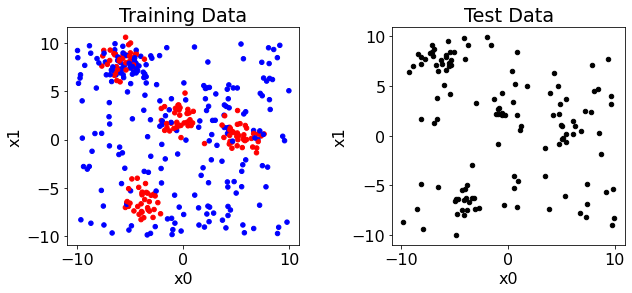

In [11]:
plt.rcParams["font.size"] = 16
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
train.plot.scatter(x="x0", y="x1", c=train["color"], vmin=-1, ax=ax[0])
test.plot.scatter(x="x0", y="x1", c="k", ax=ax[1])
ax[0].set_title("Training Data")
ax[1].set_title("Test Data")
plt.subplots_adjust(wspace=0.4)

#### Objective: use `LogisticRegression` to classify points as "red" or "blue".

In [12]:
model = LogisticRegression()
model.fit(train[["x0", "x1"]], train["y"])
model.score(test[["x0", "x1"]], test["y"])

0.576

In [13]:
model = Pipeline([
    ("km", KMeans(10)),
    ("lr", LogisticRegression()),
])
model.fit(train[["x0", "x1"]], train["y"])
model.score(test[["x0", "x1"]], test["y"])

/home/suophia/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.808

In [21]:
model = Pipeline([
    ("km", KMeans(10)),
    ("std", StandardScaler()),
    ("lr", LogisticRegression()),
])
model.fit(train[["x0", "x1"]], train["y"])
model.score(test[["x0", "x1"]], test["y"])

0.776

### Wisconsin counties example

In [22]:
df = gpd.read_file("counties.geojson")
df.head()

,NAME,POP100,AREALAND,HU100,developed,forest,pasture,crops,geometry
0,Racine County,195408,861533739,82164,0.230906,0.100167,0.072588,0.482126,"POLYGON ((645313.81834 2212738.58489, 645456.3..."
1,Clark County,34690,3133378070,15076,0.046476,0.326691,0.022979,0.444642,"POLYGON ((431909.29098 2393751.35940, 433872.5..."
2,Wood County,74749,2054044751,34088,0.080285,0.226244,0.023411,0.320990,"POLYGON ((498653.94690 2388370.84202, 498647.3..."
3,Rusk County,14755,2366092584,8883,0.035567,0.473937,0.049572,0.138357,"POLYGON ((397166.23292 2498521.78567, 397167.7..."
4,Ozaukee County,86395,603514413,36267,0.222642,0.088609,0.127867,0.389109,"POLYGON ((654796.85595 2272096.94081, 654799.8..."


#### If we want to use "POP100", "AREALAND", "developed", "forest", "pasture", "crops" for clustering, what transformer should we use? 

- StandardScaler.

### Goal here: cluster counties based on similar land usage.

<AxesSubplot:>

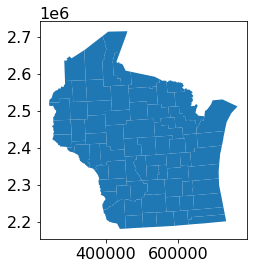

In [23]:
df.plot()

<AxesSubplot:>

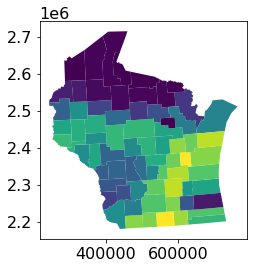

In [24]:
df.plot(column="crops")

<AxesSubplot:>

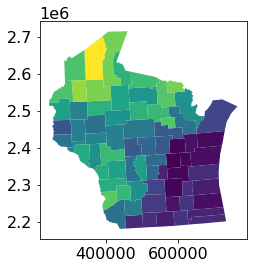

In [25]:
df.plot(column="forest")

### KMeans

1.2909085151228035
[1 0 0 2 1 0 1 3 2 0 1 1 1 2 0 3 0 0 2 2 0 2 0 1 0 0 0 0 2 1 1 1 2 0 0 0 1
 0 2 1 1 0 0 1 2 2 2 1 0 0 0 1 2 2 2 1 0 0 1 1 2 1 2 2 1 0 2 2 0 2 2 0]


<AxesSubplot:>

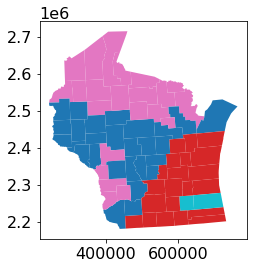

In [26]:
xcols = ["developed", "forest", "pasture", "crops"]

# instantiate
km_c = KMeans(4)
# fit
km_c.fit(df[xcols])
# predict
clusters = km_c.predict(df[xcols])

print(km_c.inertia_)
print(clusters)

df.plot(column=clusters, cmap="tab10")

**Observation**: cluster number can be random. That is, if you re-run the above cell twice, you will get different number for each cluster.

### Agglomerative clustering

- import statement
```python
from sklearn.cluster import AgglomerativeClustering
```

In [29]:
xcols = ["developed", "forest", "pasture", "crops"]

# instantiate
agg_c = AgglomerativeClustering(4)
# fit
agg_c.fit(df[xcols])
# predict
clusters = agg_c.predict(df[xcols])

print(clusters)

df.plot(column=clusters, cmap="tab10")

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'

**Observations**: 
- no centroids => no inertia => no elbow plots (how do we pick cluster count?):
    - AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'
- no `predict` method, but there is `fit_predict`:
    - AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'
    - why?
        - because each point could lead to a completely different tree
        - remember unlike KMeans (which is top-down), AgglomerativeClustering is bottom-up

[2 1 1 0 2 0 2 3 0 1 2 2 2 0 1 3 1 1 0 0 1 0 0 2 0 1 1 1 0 2 2 2 0 1 1 1 2
 1 0 2 2 1 1 2 0 0 0 2 1 1 1 2 0 0 0 2 1 1 2 2 0 2 0 0 2 0 0 0 0 0 0 1]


<AxesSubplot:>

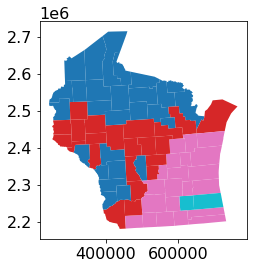

In [30]:
xcols = ["developed", "forest", "pasture", "crops"]

# instantiate
agg_c = AgglomerativeClustering(4, compute_distances=True) # use compute_distances=True to save the distances
# fit_predict
clusters = agg_c.fit_predict(df[xcols])

print(clusters)

df.plot(column=clusters, cmap="tab10")

In [31]:
# The original df has 72 rows
len(df)

72

**Observations:**
- `agg_model.children_` lists all intermediate children of the dendrogram
- [44, 62] => Row 44, 62 from the original data was grouped together
- [19, 73] => 
    - What's 73? Original df length + i, where i stands for the first group ([44, 62])
    - 19 was grouped with [44, 62]
- Last row is the root of the dendrogram

In [32]:
agg_c.children_

array([[ 44,  62],
       [ 21,  53],
       [ 11,  12],
       [ 19,  73],
       [ 31,  43],
       [ 20,  35],
       [ 58,  74],
       [  1,  27],
       [ 50,  77],
       [ 24,  68],
       [ 16,  34],
       [ 26,  57],
       [ 22,  65],
       [ 39,  47],
       [ 63,  69],
       [ 28,  38],
       [  9,  33],
       [  0,  10],
       [  2,  42],
       [  6,  64],
       [ 30,  61],
       [  3,  60],
       [ 36,  59],
       [  8,  66],
       [ 37,  88],
       [ 32,  70],
       [ 13,  54],
       [ 14,  48],
       [ 72,  87],
       [ 40,  55],
       [  4,  51],
       [ 49,  90],
       [ 45,  81],
       [ 67,  75],
       [ 29,  91],
       [ 79,  80],
       [ 23,  76],
       [ 93,  95],
       [ 98, 100],
       [ 46,  86],
       [ 41,  96],
       [ 18,  97],
       [ 25,  83],
       [ 78, 108],
       [ 94, 101],
       [ 82, 107],
       [  5,  84],
       [ 56,  71],
       [ 17, 103],
       [105, 110],
       [ 89, 106],
       [ 92, 115],
       [112,

In [33]:
# Let's peak at the first group
df.iloc[[44,  62]]

,NAME,POP100,AREALAND,HU100,developed,forest,pasture,crops,geometry
44,Forest County,9304,2626939844,8970,0.031107,0.534801,0.004466,0.011161,"POLYGON ((568513.86038 2567267.07976, 568511.3..."
62,Menominee County,4232,926217566,2253,0.029589,0.533466,0.001092,0.002670,"POLYGON ((551112.77265 2479206.62887, 551125.3..."


#### Count the number of nodes in the subtree given node index
- leaf nodes have index 0-71 (from the original df)
- intermediate nodes have index >= 72 (from `agg_model.children_`)

In [34]:
def node_count(node_idx):
    if node_idx < len(df):
        return 1
    else:
        left, right = agg_c.children_[node_idx - len(df)]
        return node_count(left) + node_count(right) + 1
    
node_count(75)

5

In [35]:
# total number of nodes in the dendrogram
node_count(len(df) + len(agg_c.children_) - 1)

143

#### Linkage Matrix 
- 4 columns: 
    - left node
    - right node
    - distances
    - node count

In [36]:
# The distance between each group in the same order as km_c.children_
agg_c.distances_

array([0.00935791, 0.01604149, 0.02092021, 0.02151293, 0.02424828,
       0.02673536, 0.02938232, 0.03475305, 0.03788484, 0.03875477,
       0.04192914, 0.0423188 , 0.04341326, 0.04484026, 0.04513118,
       0.04576086, 0.04670009, 0.04721484, 0.04756252, 0.05167189,
       0.05353054, 0.0539879 , 0.05482542, 0.05493305, 0.05559517,
       0.06046126, 0.06075136, 0.06293962, 0.0653365 , 0.07148774,
       0.07365618, 0.07755506, 0.08184372, 0.08507794, 0.08512826,
       0.08611516, 0.0933187 , 0.10028075, 0.10776496, 0.11196954,
       0.1129952 , 0.11348526, 0.11556293, 0.11643561, 0.13029843,
       0.13278952, 0.13327272, 0.13973184, 0.14087973, 0.15764458,
       0.16143954, 0.17165262, 0.18668449, 0.20984745, 0.21490193,
       0.23884304, 0.24322474, 0.26496063, 0.26698788, 0.3141989 ,
       0.3409881 , 0.34642599, 0.34903899, 0.45786527, 0.46672959,
       0.49210299, 0.50734432, 0.71479701, 1.15428952, 1.24061603,
       2.63233914])

In [37]:
# use the above node_count function 
counts = [node_count(node_idx) for node_idx in range(len(df), len(df) + len(agg_c.children_))]
counts = np.array(counts).reshape(-1, 1)
counts[:10, :]

array([[3],
       [3],
       [3],
       [5],
       [3],
       [3],
       [5],
       [3],
       [5],
       [3]])

In [38]:
linkage = np.concatenate([
    agg_c.children_, 
    agg_c.distances_.reshape(-1, 1),
    counts,
], axis=1)
linkage

array([[4.40000000e+01, 6.20000000e+01, 9.35791131e-03, 3.00000000e+00],
       [2.10000000e+01, 5.30000000e+01, 1.60414861e-02, 3.00000000e+00],
       [1.10000000e+01, 1.20000000e+01, 2.09202131e-02, 3.00000000e+00],
       [1.90000000e+01, 7.30000000e+01, 2.15129315e-02, 5.00000000e+00],
       [3.10000000e+01, 4.30000000e+01, 2.42482837e-02, 3.00000000e+00],
       [2.00000000e+01, 3.50000000e+01, 2.67353575e-02, 3.00000000e+00],
       [5.80000000e+01, 7.40000000e+01, 2.93823187e-02, 5.00000000e+00],
       [1.00000000e+00, 2.70000000e+01, 3.47530501e-02, 3.00000000e+00],
       [5.00000000e+01, 7.70000000e+01, 3.78848417e-02, 5.00000000e+00],
       [2.40000000e+01, 6.80000000e+01, 3.87547719e-02, 3.00000000e+00],
       [1.60000000e+01, 3.40000000e+01, 4.19291386e-02, 3.00000000e+00],
       [2.60000000e+01, 5.70000000e+01, 4.23187960e-02, 3.00000000e+00],
       [2.20000000e+01, 6.50000000e+01, 4.34132595e-02, 3.00000000e+00],
       [3.90000000e+01, 4.70000000e+01, 4.48402619e

#### Create dendrogram
- import statement
```python
from scipy.cluster.hierarchy import dendrogram
```

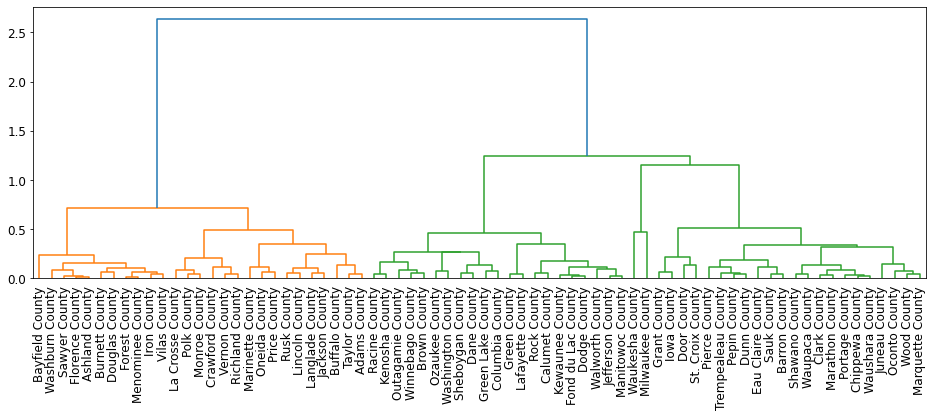

In [39]:
fig, ax = plt.subplots(figsize=(16,5))
dendrogram(linkage, labels=df["NAME"].values, ax=ax)
ax.tick_params(labelsize=12)
None